#Load Data

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/Machine Learning"

In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/Machine Learning

/content/drive/MyDrive/Colab Notebooks/Machine Learning


In [6]:
!ls -a

 Dataset		   kaggle.json
 Dataset_filter		   Try1_H.ipynb
 face-mask-detection.zip  '(versi_3)_Kegiatan_Modul_2.ipynb'
 .ipynb_checkpoints


In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
'''!kaggle datasets download -d vijaykumar1799/face-mask-detection'''

'!kaggle datasets download -d vijaykumar1799/face-mask-detection'

In [9]:
!ls -a

 Dataset		   kaggle.json
 Dataset_filter		   Try1_H.ipynb
 face-mask-detection.zip  '(versi_3)_Kegiatan_Modul_2.ipynb'
 .ipynb_checkpoints


In [10]:
'''from zipfile import ZipFile
file_name = 'face-mask-detection.zip'

with ZipFile(file_name,'r') as zip :
  zip.extractall()
  print('Berhasil')'''

"from zipfile import ZipFile\nfile_name = 'face-mask-detection.zip'\n\nwith ZipFile(file_name,'r') as zip :\n  zip.extractall()\n  print('Berhasil')"

In [11]:
import os
base_dataset = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Dataset'
class_dir = ['mask_weared_incorrect', 'with_mask', 'without_mask' ]
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [12]:
'''pip install split-folders'''

'pip install split-folders'

In [13]:
'''#pip install split-folders
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Dataset',
                   output="/content/drive/MyDrive/Colab Notebooks/Machine Learning/Dataset_filter",
                   seed=42, ratio=(0.7,0.3), group_prefix=None)
'''

'#pip install split-folders\nimport splitfolders\nsplitfolders.ratio(\'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Dataset\',\n                   output="/content/drive/MyDrive/Colab Notebooks/Machine Learning/Dataset_filter",\n                   seed=42, ratio=(0.7,0.3), group_prefix=None)\n'

In [14]:
# Definisikan path untuk data train dan data validation

base_dir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Dataset_filter'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_mask_weared_incorrect_dir = os.path.join(train_dir, 'mask_weared_incorrect')
train_with_mask_dir = os.path.join(train_dir, 'with_mask')
train_without_mask  = os.path.join(train_dir, 'without_mask')

validation_mask_weared_incorrect_dir = os.path.join(validation_dir, 'mask_weared_incorrect')
validation_with_mask_dir = os.path.join(validation_dir, 'with_mask')
validation_without_mask  = os.path.join(validation_dir, 'without_mask')

In [15]:
print('Train Mask Wared Incorrect :', os.listdir(train_mask_weared_incorrect_dir)[:2])
print('Train With Mask :', os.listdir(train_with_mask_dir)[:2])
print('Train Without Mask : ',  os.listdir(train_without_mask)[:2])
print()
print('Val Mask Wared Incorrect :', os.listdir(validation_mask_weared_incorrect_dir)[:2])
print('Val With Mask :', os.listdir(validation_with_mask_dir)[:2])
print('Val Without Mask : ',  os.listdir(validation_without_mask)[:2])


Train Mask Wared Incorrect : ['2446.png', '2452.png']
Train With Mask : ['2449.png', '2443.png']
Train Without Mask :  ['2444.png', '2466.png']

Val Mask Wared Incorrect : ['1005.png', '1010.png']
Val With Mask : ['1044.png', '1040.png']
Val Without Mask :  ['1032.png', '1005.png']


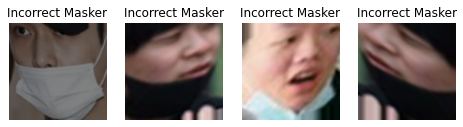

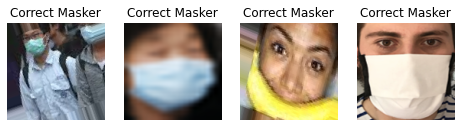

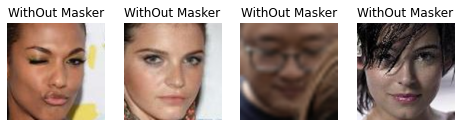

In [16]:
#1.3 Gambar
# Tampilkan 8 image per kelas dengan ukuran 2x4

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mping

mask_wear_incorr = os.listdir(train_mask_weared_incorrect_dir)
with_mask = os.listdir(train_with_mask_dir)
without_mask = os.listdir(train_without_mask)

fname1 = [os.path.join(train_mask_weared_incorrect_dir, fname)
        for fname in mask_wear_incorr[:4]]
fname2 = [os.path.join(train_with_mask_dir, fname)
        for fname in with_mask[:4]]
fname3 = [os.path.join(train_without_mask, fname)
        for fname in without_mask[:4]]


nrows = 2
ncols = 4
#Incorrect Masker
fig = plt.gcf()
fig.set_size_inches( ncols * 2,nrows * 2)
for i,fname in enumerate(fname1):
  sp = plt.subplot(2,4,i+1)
  sp.axis('off')
  img = mping.imread(fname)
  plt.title('Incorrect Masker')
  plt.imshow(img)
plt.show()

#WithMask
nrows = 2
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 2,nrows * 2)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Correct Masker')
    plt.imshow(img)
    
plt.show()

#WithMask
nrows = 2
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 2,nrows * 2)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('WithOut Masker')
    plt.imshow(img)
    
plt.show()

#Preprocessing

In [17]:
#2.1 Gathering data set 
import cv2
import numpy as np

#Gathering Data

train_data = []
train_label = []

for r, d ,f in os.walk('Dataset_filter/train'):
  for file in f:
    if ".png" in file:
      imagePath = os.path.join(r, file)
      image = cv2.imread(imagePath)
      image = cv2.resize(image, (250,250))
      train_data.append(image)

      label = imagePath.split(os.path.sep)[-2]
      train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)


In [18]:
import cv2
import numpy as np

#Gathering Data

val_data = []
val_label = []

for r, d ,f in os.walk('Dataset_filter/val'):
  for file in f:
    if ".png" in file:
      imagePath = os.path.join(r, file)
      image = cv2.imread(imagePath)
      image = cv2.resize(image, (250,250))
      val_data.append(image)

      label = imagePath.split(os.path.sep)[-2]
      val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [19]:
#2.2 Normaliasi :
print('Data sebelum di normalisasi : ', train_data[0][0][0])
x_train = train_data.astype('float32')/255.0
x_val = val_data.astype('float32')/255.0
print('Data sebelum di normalisasi : ', x_train[0][0][0])

Data sebelum di normalisasi :  [36 38 48]
Data sebelum di normalisasi :  [0.14117648 0.14901961 0.1882353 ]


In [20]:
#2.3 Encoder Label :
from sklearn.preprocessing import LabelEncoder
print("Label Sebelum di encoder : ", train_label[1:5])
lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)
print("Label Setelah di encoder : ", y_train[1:5])

Label Sebelum di encoder :  ['mask_weared_incorrect' 'mask_weared_incorrect' 'mask_weared_incorrect'
 'mask_weared_incorrect']
Label Setelah di encoder :  [0 0 0 0]


#3. Modelling

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, AveragePooling2D, GlobalMaxPooling2D,  GlobalAveragePooling2D

In [22]:
#Membuat & menampilkan scenario Pertama
#Model 1
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPooling2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0

In [24]:
#Training Model 1 
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.1), 
              loss='binary_crossentropy', 
              metrics=['acc'])
H = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
197/197 [==============================] - 378s 2s/step - loss: -4186122892607488.0000 - acc: 0.3333 - val_loss: -25945319762034688.0000 - val_acc: 0.3333
Epoch 2/15
197/197 [==============================] - 377s 2s/step - loss: -237903237867372544.0000 - acc: 0.3333 - val_loss: -924832627788087296.0000 - val_acc: 0.3333
Epoch 3/15
197/197 [==============================] - 377s 2s/step - loss: -3324143333772623872.0000 - acc: 0.3333 - val_loss: -8777315562628841472.0000 - val_acc: 0.3333
Epoch 4/15
197/197 [==============================] - 377s 2s/step - loss: -21957537477756452864.0000 - acc: 0.3333 - val_loss: -49097359130244415488.0000 - val_acc: 0.3333
Epoch 5/15
197/197 [==============================] - 377s 2s/step - loss: -95460611074209873920.0000 - acc: 0.3333 - val_loss: -187734485607404011520.0000 - val_acc: 0.3333
Epoch 6/15
197/197 [==============================] - 377s 2s/step - loss: -299684824407091445760.0000 - acc: 0.3333 - val_loss: -51800603464936351